In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/usedCars.csv")

In [ ]:
data.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [ ]:
data.shape

(1064, 19)

In [ ]:
data.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [ ]:
data.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [ ]:
data.dtypes

Id                    int64
Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

In [ ]:
data.drop('Id',axis=1,inplace=True)

In [ ]:
def convert_amount(amount_str):
  if 'Lakhs' in amount_str:
    return float(amount_str.replace(' Lakhs', '').replace(',','')) * 100000
  else:
    return float(amount_str.replace(',',''))
data['Price'] = data['Price'].apply(convert_amount)

In [ ]:
data.isnull().sum()/data.shape[0]*100

Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

In [ ]:
data.drop('CngKit',axis=1,inplace=True)

In [ ]:
data.drop('TransmissionType',axis=1,inplace=True)

In [ ]:
data['FuelType'].dropna(inplace=True)

In [ ]:
data.drop('ManufactureDate',axis=1,inplace=True)

In [ ]:
data.drop('Variant',axis=1,inplace=True)

In [ ]:
data['ModelYear'] = 2024 - data['ModelYear']
data.rename(columns={"ModelYear":"Age"},inplace=True)

In [ ]:
for i in data.columns:
  print(i,data[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [ ]:
data.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,7.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,1.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,5.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,7.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,9.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,21.000000,8.500000e+06,1.000000,9.400000


In [ ]:
data.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,6,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,3,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,9,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,4,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,14,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [ ]:
data.drop('Model',axis=1,inplace=True)

In [ ]:
# Label Encoding
cols = data.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
  le.fit(data[i])
  data[i] = le.transform(data[i])
  print(i, data[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


In [ ]:
# Removing Outliers
cols = data.select_dtypes(include=['int64','float64']).columns
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

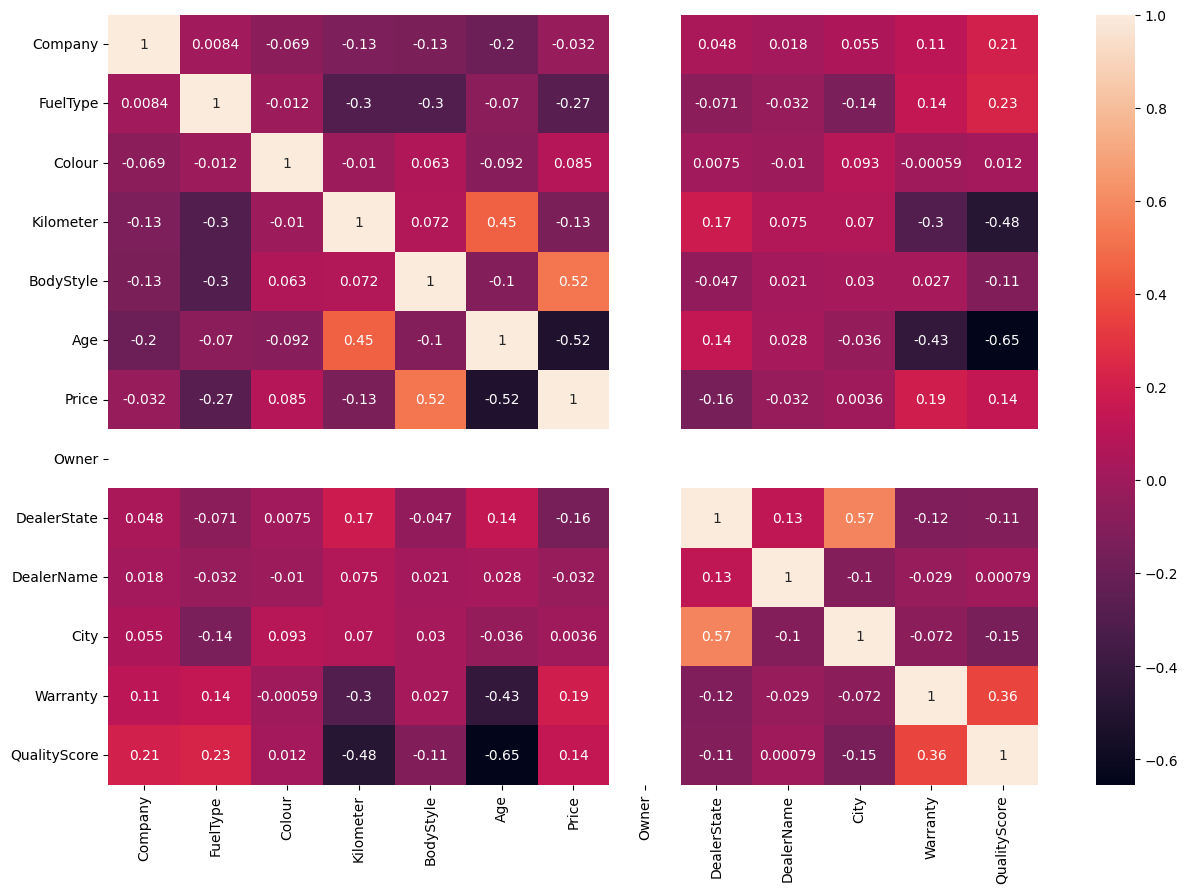

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price',axis=1), data['Price'],test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
para = {
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'random_state':[0,42]
}
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
dtr = DecisionTreeRegressor(max_depth=6,min_samples_leaf=4,min_samples_split=2,random_state=0)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))

0.7633017357257981


In [ ]:
dtr_pred = dtr.predict(X_test)

In [ ]:
dtr_pred[0]

648916.6666666666

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
para = {
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'random_state':[0,42]
}
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
rfr = RandomForestRegressor(max_depth=8,min_samples_leaf=2,min_samples_split=2,random_state=0)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.8922093892033637


In [ ]:
rfr_pred = rfr.predict(X_test)

In [ ]:
rfr_pred[0]

612929.8485315624

<ipython-input-38-9308347c9557>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('DTC')
<ipython-input-38-9308347c9557>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = dtr_pred, ax = ax[0], colo

<Axes: title={'center': 'RFR'}, ylabel='Density'>

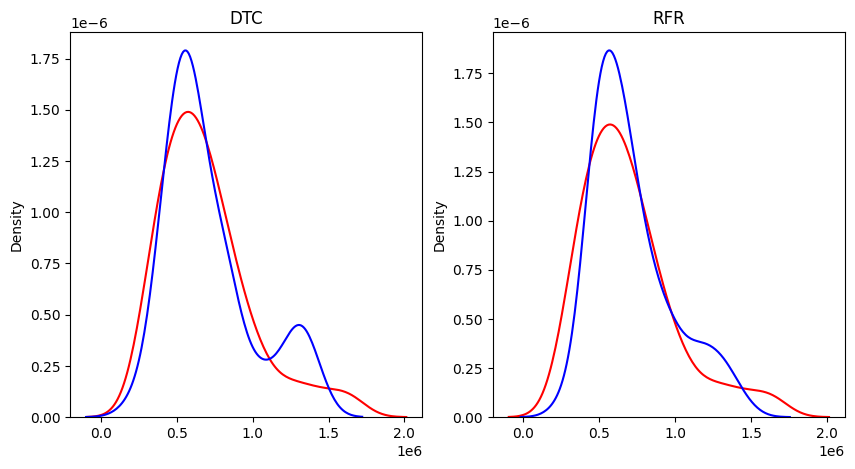

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('DTC')
sns.distplot(x = dtr_pred, ax = ax[0], color = 'b', hist = False, label = 'Predicted')
sns.distplot(x = y_test, ax = ax[1], color = 'r', hist = False, label = 'Actual').set_title('RFR')
sns.distplot(x = rfr_pred, ax = ax[1], color = 'b', hist = False, label = 'Predicted')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("DTC")
print("mean_squared_error", mean_squared_error(y_test, dtr_pred))
print("mean_absolute_error", mean_absolute_error(y_test, dtr_pred))
print("r2_score", r2_score(y_test, dtr_pred))

print()
print()

print("RFR")
print("mean_squared_error", mean_squared_error(y_test, rfr_pred))
print("mean_absolute_error", mean_absolute_error(y_test, rfr_pred))
print("r2_score", r2_score(y_test, rfr_pred))

DTC
mean_squared_error 39650661737.74194
mean_absolute_error 146393.40282932413
r2_score 0.5689612243610533


RFR
mean_squared_error 28952122030.700592
mean_absolute_error 122585.28783370154
r2_score 0.6852640867684735


Text(0.5, 1.0, 'Random Forest Regressor')

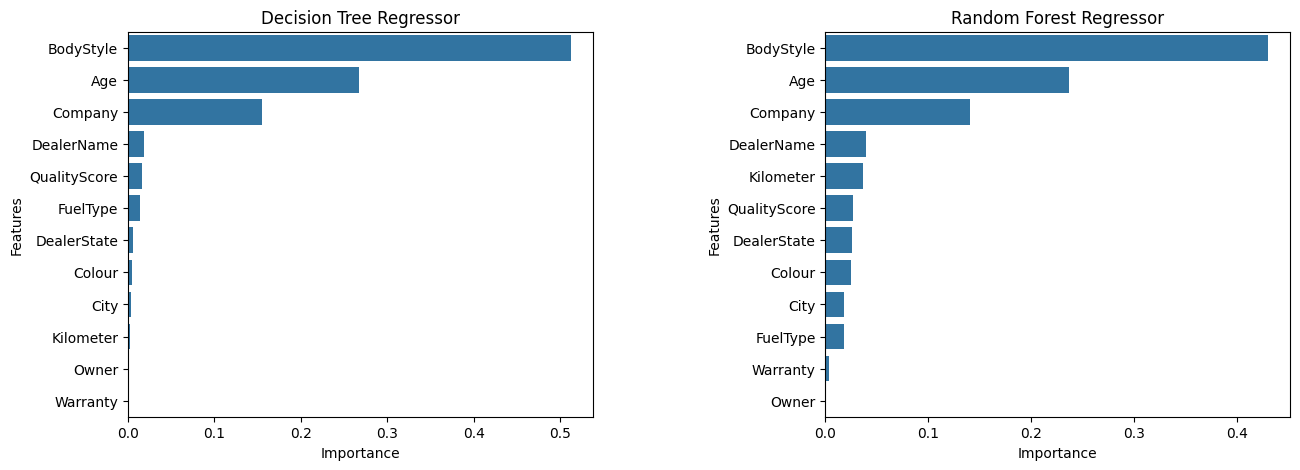

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

In [42]:
import pickle
# Save the model to a pickle file
with open('Indian_Used_Car_Prediction.pkl', 'wb') as file:
    pickle.dump(rfr_pred, file)

In [43]:
data.head()

,Company,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,12,4,61,33197,1,6,575000.0,0,2,52,0,1,7.8
1,12,4,56,10322,1,3,435000.0,0,2,38,0,1,8.3
2,7,4,34,37889,1,9,470000.0,0,2,4,0,1,7.9
3,19,4,0,13106,1,4,990000.0,0,2,1,0,1,8.1
7,12,4,0,76259,3,11,600000.0,0,2,29,0,1,7.6


In [44]:
import numpy as np

# Example input data
input_data = {'Company': 12, 'FuelType': 4, 'Colour': 61,'Kilometer': 33197,'BodyStyle': 1,'Age': 3,'Owner': 0,'DealerState': 2,'DealerName': 52,'City': 0,'Warranty':1,'QualityScore':7.8}

# Convert input data to NumPy array
input_array = np.array([[input_data['Company'], input_data['FuelType'], input_data['Colour'],input_data['Kilometer'],input_data['BodyStyle'],input_data['Age'],input_data['Owner'],input_data['DealerState'],input_data['DealerName'],input_data['City'],input_data['Warranty'],input_data['QualityScore']]])


# Make a prediction
prediction = rfr.predict(input_array)

# Print the prediction
print("Model Prediction:", prediction)

Model Prediction: [642145.28654124]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


From the exploratory data analysis, I have revealed two major facts about the used car market: which are demand and price. The demand of low price used car is pretty high as compared to the to expensive ones, which highlights the customers attraction towards budget cars. But upon studying the graph I also came to know about some interesting facts about the used car market. Begining with the car companies, companies like- MG, Mercedes Benz, BMW, Volvo and KIA have the highest price but Maruti Suzuki, Hyundai, Honda, Mahindra and Tata car are in higher demand. This highlights that customer prefer to buy new luxury cars instead of used ones.

Majority of the cars run either on petro or diesel, with diesel cars having slightly higher price. I als came to know that car is major player in the market. Cars like white, grey, silver and black are in higher demand but exotic colors like burgundy, riviera red, dark blue, black majic have higher price. Coming to the car's odometer reading, most of the cars have reading less than 10,000 km, and cars with lower odometer reading have the higher price.

Cars with bodystyle like HatchBack, SUV and Sedan are most preferred by the customers whereas the bodystyle like MPV, SUV and Sedan are the top most ecpensive ones. Age of the car also play a major role in its resale value. As the car age increases, it resale value decreases. Therefore, cars than age less than 5 years have higher price and prefered more. Car price aslo changes by location. Delhi, Maharashtra and Rajstan are the top three states with the highes price and Car Estate, Star Auto India and Car Choice are the top three dealers with the highest price.

Customers usually prefer the car with 1st owner type resulting in hugher demand as well as higher price. Cars that comes with a warranty provudes an assurance to the customer, resulting in a little bit higher price. The last feature i.e. Quality score also dictates the car price, where cars with higher quality score have higher price.

Coming to the machine learning models, I have used Descision tree regressor and random forest regressor to predict the car price. The random forest regressor model performed better than the decision tree regressor model. Moreover, from the feature importance graph, we can see that the car age, bodystyle and comapny are the key features that affect the car price.